In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
news_dataset = pd.read_csv('/content/gdrive/My Drive/train.csv')

# Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import io
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Punctuations Removal

In [6]:
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

# Data Pre-Processing

In [7]:
news_dataset.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [8]:
news_dataset.shape

(20800, 5)

In [9]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
news_dataset['label'].size

20800

In [12]:
news_dataset['label_num'] = news_dataset['label'].map(lambda x: 1 if x == 1 else 0)

In [13]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [14]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [15]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [16]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [17]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

# Data Cleaning

In [18]:
news_dataset.duplicated(subset={"title"}).value_counts()

False    19804
True       996
dtype: int64

In [19]:
# Deleting the duplicates
news_dataset_1 =  news_dataset.drop_duplicates(subset={"title"},keep="first")

In [20]:
news_dataset_1.duplicated(subset={"title"}).value_counts()

False    19804
dtype: int64

**Stemming** : is the process of reducing a word to its Root word

Example: actor, actress, acting --> act

In [21]:
port_stem = PorterStemmer()

In [22]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [23]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [24]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


# Excluding important words for Sentiment Analysis

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = stopwords.words('english') #All the stopwords in English language

#excluding some useful words from stop words list as we doing sentiment analysis
excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop = [words for words in stop if words not in excluding]
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
 #initialising the Porter Stemmer
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

# Preprocessing on the Dataset

In [27]:
i = 0
string1 = ' '
final_string = []
fake_words = []                
real_words = []
s = ''

for sent in news_dataset_1['text'].values:
    filtered_sentence = []

    for w in sent.split():
        if((w.isalpha()) and (len(w)>2)):  
            if(w.lower() not in stop):    # If it is a stopword
                s = (port_stem.stem(w.lower())).encode('utf8')
                filtered_sentence.append(s)
                if(news_dataset_1['label'].values)[i] == 0:
                    real_words.append(s)
                if(news_dataset_1['label'].values)[i] == 1:
                    fake_words.append(s)
            else:
                continue
        else:
            continue 
    string1 = b" ".join(filtered_sentence) 
    final_string.append(string1)
    i += 1

# Counting Fake and Real Words in Text

In [28]:
from collections import Counter
print("Number of Real words: ", len(real_words))
print("Number of Fake words: ", len(fake_words))

Number of Real words:  3835240
Number of Fake words:  2736499


# Separating Data and Labels

In [29]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [30]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [31]:
print(Y)

[1 0 1 ... 0 1 1]


In [32]:
Y.shape

(20800,)

In [33]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [34]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# Splitting the dataset to training and test data

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# Logistic Regression

In [36]:
model_1 = LogisticRegression()
model_1.fit(X_train, Y_train)

LogisticRegression()

# Passive Aggressive Classifier

In [37]:
model_2 = PassiveAggressiveClassifier()
model_2.fit(X_train, Y_train)

PassiveAggressiveClassifier()

# Naive Bayes

In [38]:
model_3 = MultinomialNB()
model_3.fit(X_train, Y_train)

MultinomialNB()

# Decision Tree Classifier

In [40]:
model_4 = DecisionTreeClassifier()
model_4.fit(X_train, Y_train)

DecisionTreeClassifier()

# KNN

In [41]:
model_5 = KNeighborsClassifier(n_neighbors=3)
model_5.fit(X_train, Y_train)
pred_knn = model_5.predict(X_test)

# Evaluation

 Model 1 : Logistic Regression

In [42]:
# Accuracy score on the Training and Test Data
X_train_prediction = model_1.predict(X_train)
X_test_prediction = model_1.predict(X_test)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [43]:
print('Accuracy score of the training data : ', training_data_accuracy)
print('Accuracy score of the testing  data : ', test_data_accuracy)

Accuracy score of the training data :  0.9865985576923076
Accuracy score of the testing  data :  0.9790865384615385


 Model 2 : Passive Aggressive Classifier

In [44]:
# Accuracy score on the Training and Test Data
X_train_prediction = model_2.predict(X_train)
X_test_prediction = model_2.predict(X_test)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
print('Accuracy score of the training data : ', training_data_accuracy)
print('Accuracy score of the testing  data : ', test_data_accuracy)

Accuracy score of the training data :  1.0
Accuracy score of the testing  data :  0.9920673076923077


 Model 3 : Naive Bayes

In [46]:
# Accuracy score on the Training and Test Data
X_train_prediction = model_3.predict(X_train)
X_test_prediction = model_3.predict(X_test)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [47]:
print('Accuracy score of the training data : ', training_data_accuracy)
print('Accuracy score of the testing  data : ', test_data_accuracy)

Accuracy score of the training data :  0.9782451923076924
Accuracy score of the testing  data :  0.9550480769230769


Model 4 : Decision Tree Classifier

In [48]:
# Accuracy score on the Training and Test Data
X_train_prediction = model_4.predict(X_train)
X_test_prediction = model_4.predict(X_test)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [49]:
print('Accuracy score of the training data : ', training_data_accuracy)
print('Accuracy score of the testing  data : ', test_data_accuracy)

Accuracy score of the training data :  1.0
Accuracy score of the testing  data :  0.9915865384615384


Model 5 : KNN

In [50]:
# Accuracy score on the Training and Test Data
X_train_prediction = model_5.predict(X_train)
X_test_prediction = model_5.predict(X_test)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [51]:
print('Accuracy score of the training data : ', training_data_accuracy)
print('Accuracy score of the testing  data : ', test_data_accuracy)

Accuracy score of the training data :  0.5865985576923077
Accuracy score of the testing  data :  0.5360576923076923


# Predictive System

Test Case 1 : Testing for Real News

In [52]:
X_new = X_test[1]

prediction = model_1.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [53]:
print(Y_test[1])

0


Test Case 2 : Testing for Fake News

In [54]:
X_new = X_test[2]

prediction = model_1.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [55]:
print(Y_test[2])

1


# Graphical Analysis for Training Dataset

Text(0.5, 1.0, 'Accuracy Score on Training Dataset')

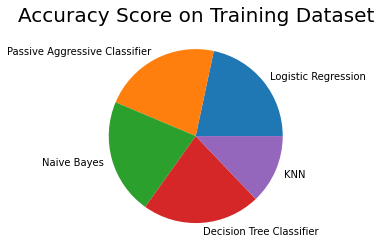

In [56]:
model_accuracy = {
    'Logistic Regression': 0.986,
    'Passive Aggressive Classifier': 1.0,
    'Naive Bayes': 0.978,
    'Decision Tree Classifier': 1.0,
    'KNN': 0.586
}

pd.Series(model_accuracy).plot(kind='pie',label="")
plt.title('Accuracy Score on Training Dataset',fontsize=20)

# Graphical Analysis for Testing Dataset

Text(0.5, 1.0, 'Accuracy Score on Testing Dataset')

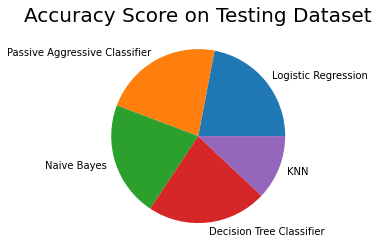

In [57]:
model_accuracy = {
    'Logistic Regression': 0.979,
    'Passive Aggressive Classifier': 0.9918,
    'Naive Bayes': 0.955,
    'Decision Tree Classifier': 0.991,
    'KNN': 0.536
}

pd.Series(model_accuracy).plot(kind='pie',label="")
plt.title('Accuracy Score on Testing Dataset',fontsize=20)